# **Construindo um Modelo com Tensorflow -  🐶 🐱!**

**Problema: uma imagem, dizer se é um dog ou um cat.**

Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

* **Treinamento**: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
* **Teste**: 1.000 imagens de dogs e cats.

Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Por fim, o modelo de duas camadas de convolução seguidas de pooling, a camada de flattening, e as camadas totalmente conectadas (Dense), com a função de ativação sigmoid para a saída binária.

**Não há mágica. Há matemática!** 🧙

**Fonte de dados**

O Kaggle oferece diversos datasets públicos que podem ser usados para você desenvolver seus projetos e incluir no seu portfólio, uma excelente forma de demonstrar suas habilidades em Data Science e Machine Learning. Usaremos como fonte de dados, o famoso [dataset Dogs and Cats](https://www.kaggle.com/c/dogs-vs-cats/data).

**Carregando os dados de Treino e Teste**

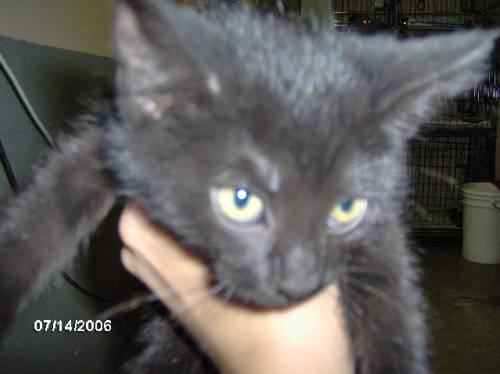

In [72]:
from IPython.display import Image
Image(filename = 'C:/Users/ryanr/Documents/Python/datasets/dogs-vs-cats/test1/test1/302.jpg')

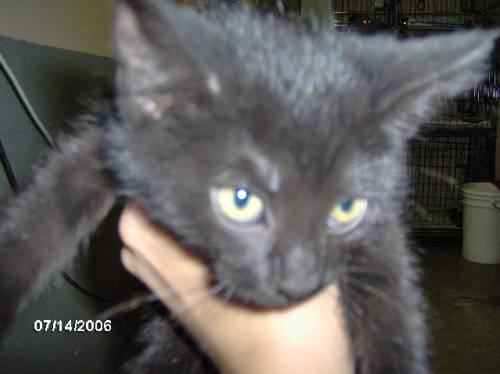

In [73]:
Image(filename = 'C:/Users/ryanr/Documents/Python/datasets/dogs-vs-cats/test1/test1/302.jpg')

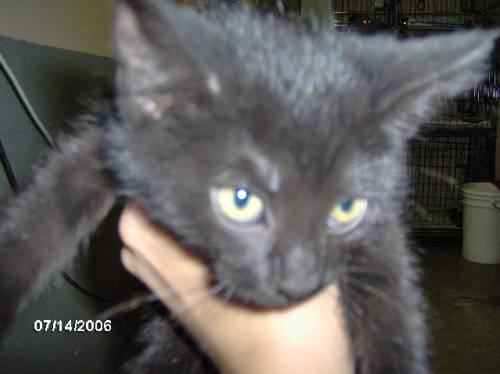

In [74]:
Image(filename = 'C:/Users/ryanr/Documents/Python/datasets/dogs-vs-cats/test1/test1/302.jpg')

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.

In [75]:
import tensorflow as tf

In [76]:
import keras as K

In [77]:
# Importar K e suas funções necessárias
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.optimizers import Adam

In [78]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [79]:
# Definindo a arquitetura do modelo
classifier = Sequential()
# Usando Input como a primeira camada
classifier.add(Input(shape=(64, 64, 3)))  # Definindo a forma da entrada
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(64, (3, 3), activation='relu'))  # Camada convolucional adicional
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

# Compilando o modelo
classifier.compile(optimizer=Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [81]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory(r'C:\Users\ryanr\Documents\Python\datasets\dogs-vs-cats\train',
                                                 target_size = (64, 64),
                                                 batch_size = 64,
                                                 shuffle = True,
                                                 seed = 198,
                                                 class_mode = 'binary')

Found 25000 images belonging to 2 classes.


**Treinamento do Modelo**

In [82]:
# Executando o treinamento
# classifier.fit(training_set,
#                steps_per_epoch=781,
#                epochs=25)

# steps_per_epoch é um parâmetro que define quantas fotos cada epoche vai ser treinada. Para um valor pequeno como 5, 
# é de se esperar que o modelo performe negativamente.
# O valor ideal é dado pela razão da quantidade de imagens de treinamento pelo batch_size = 25.000/32 = _____781 steps______
# Dessa maneira, todo o dataset de treinamento será consumido pelo modelo, aumentando a accuracy.

classifier.fit(training_set,
               steps_per_epoch=70,
               epochs=25)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 26s 319ms/step - accuracy: 0.5125 - loss: 0.7107
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 333ms/step - accuracy: 0.5740 - loss: 0.6749
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 301ms/step - accuracy: 0.6274 - loss: 0.6524
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 28s 397ms/step - accuracy: 0.6679 - loss: 0.6197
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 327ms/step - accuracy: 0.6978 - loss: 0.5895
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - accuracy: 0.6977 - loss: 0.5925
Epoch 7/25


C:\Users\ryanr\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 321ms/step - accuracy: 0.7076 - loss: 0.5817
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 349ms/step - accuracy: 0.7382 - loss: 0.5380
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 339ms/step - accuracy: 0.7308 - loss: 0.5368
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 304ms/step - accuracy: 0.7455 - loss: 0.5173
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 294ms/step - accuracy: 0.7537 - loss: 0.5202
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - accuracy: 0.7697 - loss: 0.4729
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 276ms/step - accuracy: 0.7579 - loss: 0.4943
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 267ms/step - accuracy: 0.7634 - loss: 0.4888
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 290ms/step - accuracy: 0.7663 - loss: 0.4848
Epoch 16/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 267ms/step - accuracy: 0.7856 - loss: 0.4627
Epoch 17/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 264ms/step - accuracy: 0.7823 - loss: 0.4604
Epoch 18/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 154

Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.

**Teste do Modelo**

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação se a imagem é de um gato ou cachorro.

In [83]:
print(training_set.class_indices)

{'cats': 0, 'dogs': 1}


In [87]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import display, Image
import ipywidgets as widgets
from IPython.display import clear_output

# Definindo o caminho do diretório de teste
test_dir = r'C:\Users\ryanr\Documents\Python\datasets\dogs-vs-cats\test1\test1'

# Lista de arquivos no diretório de teste
test_files = [f for f in os.listdir(test_dir) if f.endswith('.jpg')]

# Limitar a lista aos primeiros 100 arquivos
test_files = test_files[:100]

# Invertendo o mapeamento class_indices para obter o nome da classe
inv_class_indices = {v: k for k, v in training_set.class_indices.items()}

# Inicializando contadores e listas
total_predictions = len(test_files)
predictions = []
user_feedback = []
incorrect_images = []
correct_labels = []

# Função para exibir imagem e coletar feedback
def display_image(img_path, predicted_class):
    img = Image(filename=img_path)
    
    # Criar botões de feedback
    button_correct = widgets.Button(description='Correta')
    button_incorrect = widgets.Button(description='Incorreta')

    # Função para registrar o feedback
    def on_correct(b):
        user_feedback.append(True)  # Armazenar feedback como verdadeiro
        clear_output(wait=True)
        display_next_image()

    def on_incorrect(b):
        user_feedback.append(False)  # Armazenar feedback como falso
        # Armazenar a imagem incorreta e o rótulo correto
        incorrect_images.append(img_path)
        correct_labels.append(1 if inv_class_indices[predicted_class] == 'dog' else 0)
        clear_output(wait=True)
        display_next_image()

    # Exibir imagem e botões
    display(img)
    print(f"Predição: {inv_class_indices[predicted_class]} ({predicted_class})")
    display(button_correct, button_incorrect)

    # Conectar botões a suas funções
    button_correct.on_click(on_correct)
    button_incorrect.on_click(on_incorrect)

# Função para exibir a próxima imagem ou resultados finais
def display_next_image():
    if len(predictions) < total_predictions:
        # Exibir a próxima imagem
        img_path = os.path.join(test_dir, test_files[len(predictions)])
        test_image = image.load_img(img_path, target_size=(64, 64))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0) / 255.0

        # Fazendo a predição usando o modelo classifier
        result = classifier.predict(test_image, verbose=0)
        confidence = result[0][0]
        predicted_class = 1 if confidence > 0.5 else 0  # 1 = Cachorro, 0 = Gato

        # Armazenar predição para referência
        predictions.append(predicted_class)

        # Exibir imagem e coletar feedback
        display_image(img_path, predicted_class)
    else:
        # Todas as imagens foram avaliadas, agora calcular a acurácia
        calculate_accuracy()

# Função para calcular e exibir a acurácia
def calculate_accuracy():
    correct_predictions = sum(user_feedback)
    print('-' * 50)
    print(f"Número total de predições: {total_predictions}")
    print(f"Número de predições corretas: {correct_predictions}")
    print(f"Acurácia: {correct_predictions / total_predictions * 100:.2f}%")
    
    if incorrect_images:
        retrain_model()

# Função para re-treinar o modelo com feedback
def retrain_model():
    print("Re-treinando o modelo com feedback...")
    
    # Gerador de dados para re-treino
    feedback_datagen = ImageDataGenerator(rescale=1./255)

    # Preparando os dados de re-treino
    feedback_images = np.array([image.img_to_array(image.load_img(img, target_size=(64, 64))) for img in incorrect_images])
    feedback_images = feedback_images / 255.0  # Normalizando

    feedback_labels = np.array(correct_labels)

    # Re-treinando o modelo
    classifier.fit(feedback_images, feedback_labels, epochs=3, verbose=1)

    print("Re-treino completo! Avalie novamente o desempenho do modelo.")

# Começar a exibir a primeira imagem
display_next_image()


--------------------------------------------------
Número total de predições: 100
Número de predições corretas: 60
Acurácia: 60.00%
Re-treinando o modelo com feedback...
Epoch 1/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 0.1522
Epoch 2/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0067 
Epoch 3/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 5.3761e-04 
Re-treino completo! Avalie novamente o desempenho do modelo.


**O modelo recebeu uma imagem que nunca tinha visto antes e com base no que aprendeu durante o treinamento, foi capaz de classificar.**

Convertemos a imagem de teste em um vetor de pixels e apresentamos ao modelo.
O modelo compara o vetor da imagem de teste com seus pesos e então emite a classificação.

**Melhorias adicionais para este modelo:**

*   Aumentar o número de épocas para 25 para uma aprendizagem mais profunda.
*   aumentar o redimensionamento da imagem de 64x64 para 256x256.
*   Aumentar o tamanho do lote de 32 para 64.
*   Alterar a arquitetura da rede incluindo mais uma camada convolucional.
*   Avaliar outras métricas do modelo e ajustar os hiperparâmetros de acordo.
*   Experimentar outros algoritmos de otimização.








Fim! 🔥